# Visualizing predictions

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

import sys
sys.path.append('../src')
from multiclass import *

import torch 

from IPython.display import display

In [2]:
PATH = os.path.abspath('..')

# Load data

In [3]:
preds = pd.read_csv(f'{PATH}/catalogs/predictions-oh_p50.csv', index_col=0)
preds.sample(5)

,oh_p50,prediction
objID,,
1237651273494036895,8.842791,8.781910
1237657609103868379,9.108610,9.040790
1237662337863516296,9.008656,9.031652
1237674366458200421,8.827679,8.907695
1237662662684049844,8.836294,8.836800


In [7]:
def load_image(idx, df, sz=128, ax=None, annotate=True):
    """Helper function to display and annotate image"""
    
    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(4, 4))
        
    Z_true, Z_pred = df.iloc[idx]
    name = df.index[idx]
    
    # get image
    image = plt.imread(f'{PATH}/test/{name}.jpg')
    ax.imshow(image)
    ax.axis('off')
    
    # label
    if annotate:
        fontdict = dict(color='white', size=18)
        #ax.text(0.5, 0.9, f'{name}', fontdict=fontdict, transform=ax.transAxes, ha='center', va='bottom')
        ax.text(0.95, 0.125, r'$Z_{\rm true}$' + f' = {Z_true:.3f}', fontdict=fontdict, transform=ax.transAxes, ha='right', va='bottom')
        ax.text(0.95, 0.025, r'$Z_{\rm pred}$' + f' = {Z_pred:.3f}', fontdict=fontdict, transform=ax.transAxes, ha='right', va='bottom')

# Show $Z_{\rm pred} \in \{ 8.3, 8.6, 8.9, 9.2\}$

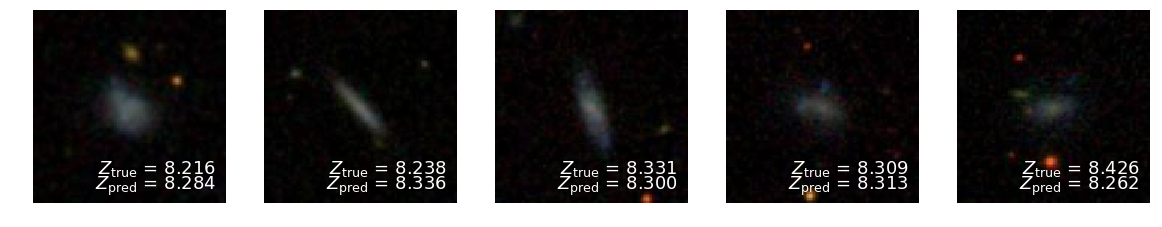

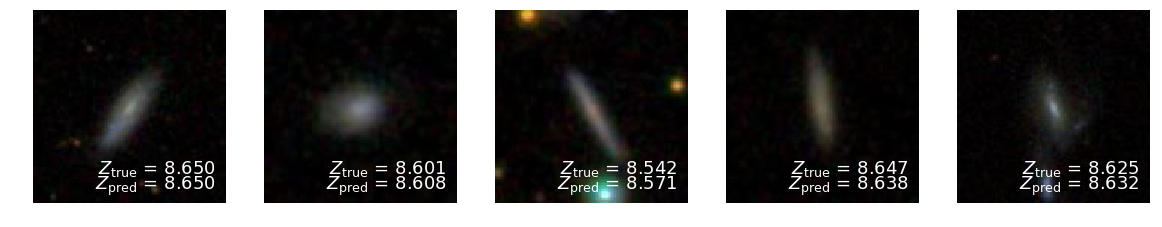

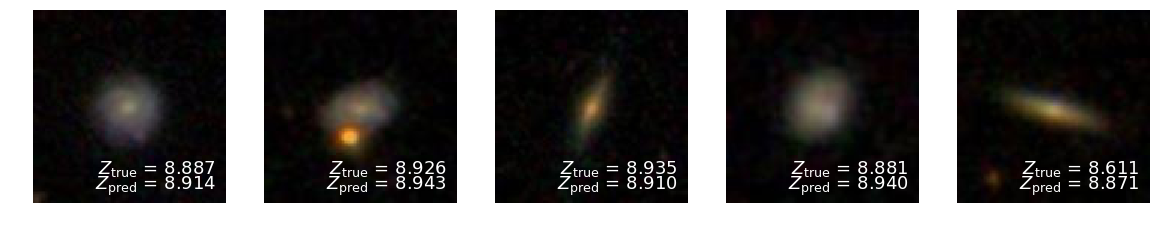

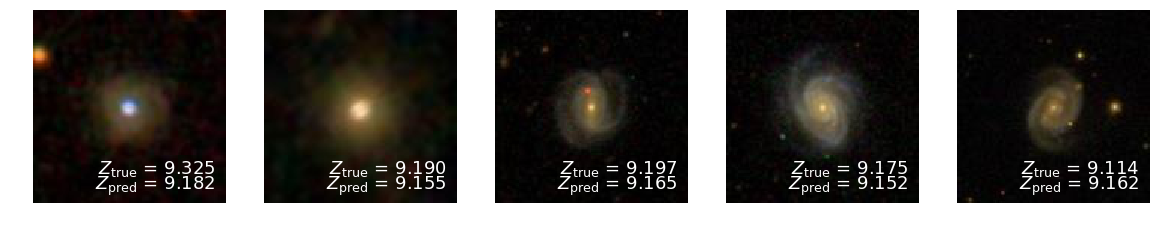

In [8]:
dZ = 0.05
metallicities = [8.3, 8.6, 8.9, 9.2]

for Z in metallicities:
    sub = preds[np.logical_and(preds.prediction < Z + dZ, preds.prediction > Z - dZ)]
    
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    
    rand = sub.sample(frac=1., random_state=256)

    for idx in range(5):
        ax = axes.flat[idx]
        load_image(idx, rand, ax=ax)
        


# Show $Z_{\rm true} \in \{ 8.3, 8.6, 8.9, 9.2\}$

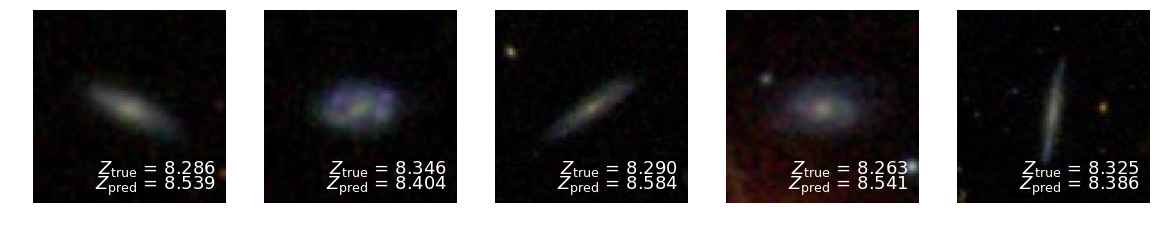

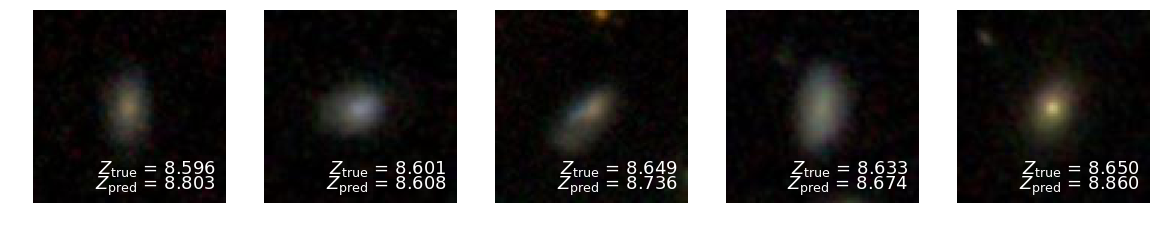

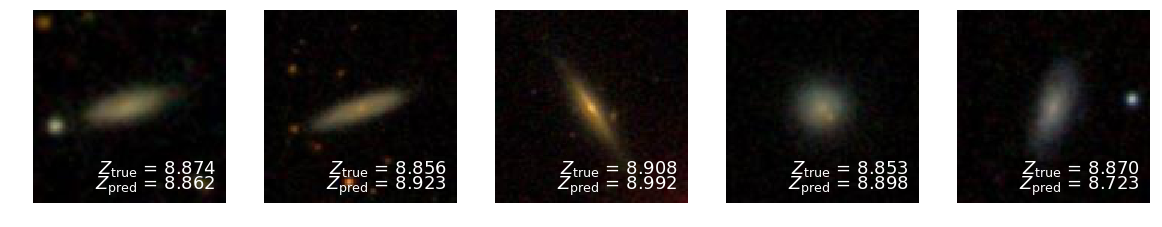

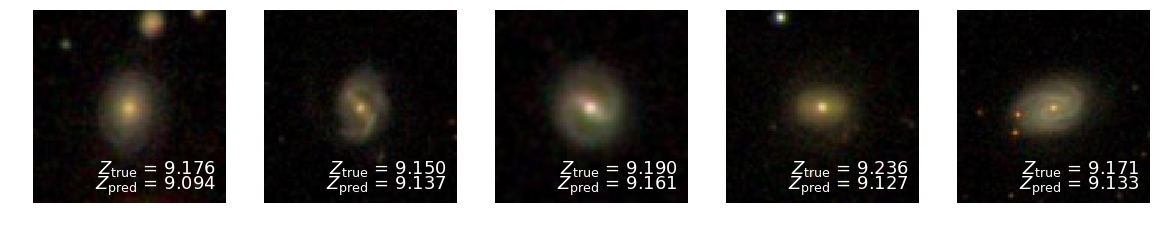

In [9]:
dZ = 0.05
metallicities = [8.3, 8.6, 8.9, 9.2]

for Z in metallicities:
    sub = preds[np.logical_and(preds.oh_p50 < Z + dZ, preds.oh_p50 > Z - dZ)]
    
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    
    rand = sub.sample(frac=1., random_state=256)

    for idx in range(5):
        ax = axes.flat[idx]
        load_image(idx, rand, ax=ax)
        
